In [1]:
from coffea.nanoevents import NanoAODSchema,NanoEventsFactory
from coffea import processor
from coffea.analysis_tools import PackedSelection
import hist
from MonoHiggstobb.Debug.control.Snip_debug import *
import awkward as ak

In [2]:
events = NanoEventsFactory.from_root(
    "/commonfs/store/data/Run2018B/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/250000/1EB0271E-85AD-3D47-B4D2-2D2F2DF5E23D.root",
    schemaclass=NanoAODSchema.v7,
    metadata={
        "dataset":"MET_Run2018"
    }
).events()

In [3]:
len(events)

2125954

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f58d4e87010>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

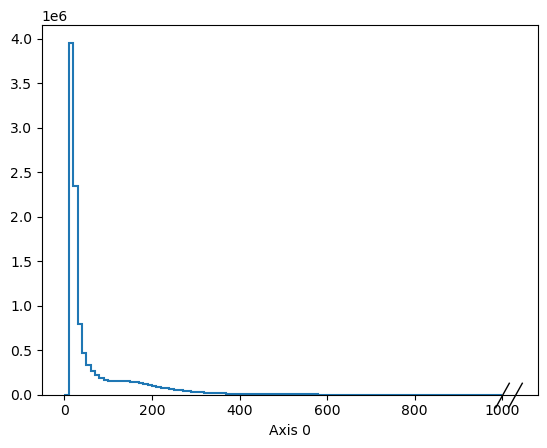

In [4]:
hist.Hist.new.Reg(100,0,1000).Double().fill(ak.flatten(events.Jet.pt)).plot()

In [5]:
cutflow = {}

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f58cb24c340>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

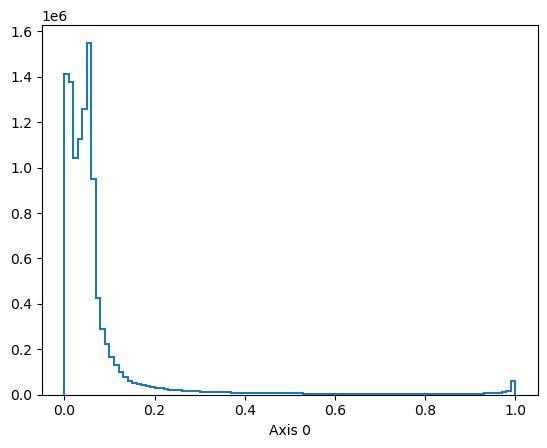

In [6]:
hist.Hist.new.Reg(100,0,1).Double().fill(ak.flatten(events.Jet.btagDeepFlavB)).plot()

In [7]:
wp = get_wp(Era=2018,wp="medium")
print(wp)
print(len(events.Jet))
events.Jet

0.2783
2125954


<JetArray [[Jet, Jet, Jet, ... Jet, Jet, Jet]] type='2125954 * var * jet'>

In [8]:
is_bjet = events.Jet.btagDeepFlavB > wp
print(len(is_bjet))
is_bjet

2125954


<Array [[False, False, ... False, False]] type='2125954 * var * bool'>

In [9]:
bjets = events.Jet[is_bjet]
print("Total Jets : ", ak.sum(ak.num(bjets)))
bjets

Total Jets :  500652


<JetArray [[], [Jet, Jet, Jet], ... [Jet], [], []] type='2125954 * var * jet'>

In [10]:
at_least_two_such_jets = ak.num(bjets, axis=1) >= 2
at_least_two_such_jets

<Array [False, True, False, ... False, False] type='2125954 * bool'>

In [11]:
bjets = bjets[at_least_two_such_jets]
print("Total Jets : ", ak.sum(ak.num(bjets)))
bjets

Total Jets :  184921


<JetArray [[Jet, Jet, Jet], ... [Jet, Jet]] type='85331 * var * jet'>

In [12]:
leading_bjets = bjets[:,0]
leading_jet_pt_at_least_50 = leading_bjets.pt > 50
leading_jet_pt_at_least_50 #event sized

<Array [True, True, True, ... True, True, True] type='85331 * bool'>

In [13]:
bjets = bjets[leading_jet_pt_at_least_50 ]
print("Total Jets : ", ak.sum(ak.num(bjets)))
bjets

Total Jets :  150096


<JetArray [[Jet, Jet, Jet], ... [Jet, Jet]] type='68571 * var * jet'>

In [14]:
subleading_bjets = bjets[:,1]
subleading_jet_pt_at_least_30 = subleading_bjets.pt > 30
subleading_jet_pt_at_least_30 #event sized

<Array [True, True, True, ... True, False] type='68571 * bool'>

In [15]:
bjets = bjets[subleading_jet_pt_at_least_30]
print("Total Jets : ", ak.sum(ak.num(bjets)))
bjets

Total Jets :  101242


<JetArray [[Jet, Jet, Jet], ... [Jet, Jet, Jet]] type='45065 * var * jet'>

In [16]:
dijets = bjets[:,0]+bjets[:,1]
dijets.mass

<Array [137, 286, 79.1, ... 331, 44.1, 525] type='45065 * float32'>

In [17]:
dijets_mass_window = (dijets.mass < 150) & (dijets.mass > 100)
dijets = dijets[dijets_mass_window]
print("Total Jets : ", len(dijets) )
dijets.mass

Total Jets :  6864


<Array [137, 114, 136, 135, ... 124, 114, 111] type='6864 * float32'>

In [18]:
dijets_pt_selection = dijets.pt > 100
dijets = dijets[dijets_pt_selection]
print("Total Jets : ", len(dijets) )
dijets.pt

Total Jets :  4767


<Array [120, 144, 266, 357, ... 273, 160, 371] type='4767 * float32'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f58cb1436d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

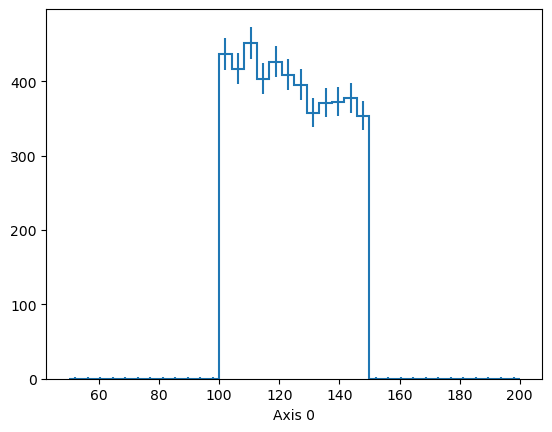

In [19]:
hist.Hist.new.Reg(36,50,200).Double().fill(dijets.mass).plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f58d8c71b40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

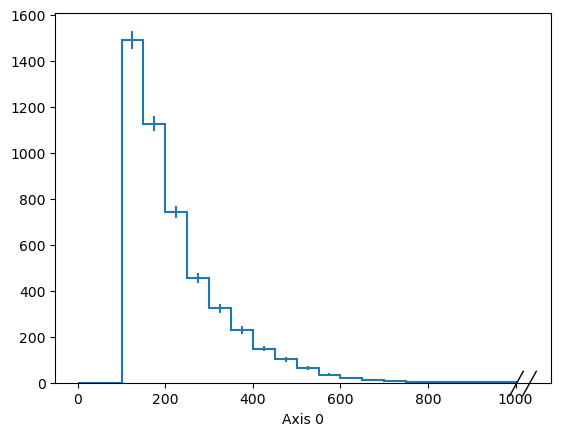

In [20]:
hist.Hist.new.Reg(20,0,1000).Double().fill(dijets.pt).plot()

In [21]:
# wp = get_wp(Era=2018,wp="medium")
# is_bjet = events.Jet.btagDeepFlavB > wp
# bjets = events.Jet[is_bjet]
# at_least_two_such_jets = ak.num(bjets, axis=1) >= 2
# bjets = bjets[at_least_two_such_jets]
# leading_bjets = bjets[:,0]
# leading_jet_pt_at_least_50 = leading_bjets.pt > 50
# bjets = bjets[leading_jet_pt_at_least_50 ]
# subleading_bjets = bjets[:,1]
# subleading_jet_pt_at_least_30 = subleading_bjets.pt > 30
# bjets = bjets[subleading_jet_pt_at_least_30]
# dijets = bjets[:,0]+bjets[:,1]
# dijets_mass_window = (dijets.mass < 150) & (dijets.mass > 100)
# dijets = dijets[dijets_mass_window]
# dijets_pt_selection = dijets.pt > 100
# dijets = dijets[dijets_pt_selection]

In [22]:
print("No cut: ", len(events))

events1 = events[at_least_two_such_jets]
print("dijet events: " , len(events1))

events2 = events1[leading_jet_pt_at_least_50]
print("leading jet pt > 50: ", len(events2))

events3 = events2[subleading_jet_pt_at_least_30]
print("subleading jet pt > 30: ", len(events3))

events4 = events3[dijets_mass_window]
print("100 < M_bb < 150: ", len(events4))

events5 = events4[dijets_pt_selection]
print("pt(bb) > 100: ", len(events5))

one_normal_additional_jet = ak.num(events5.Jet) >= 3
events6 = events5[one_normal_additional_jet]
print("At least one normal additional jet: ", len(events6))

No cut:  2125954
dijet events:  85331
leading jet pt > 50:  68571
subleading jet pt > 30:  45065
100 < M_bb < 150:  6864
pt(bb) > 100:  4767
At least one normal additional jet:  4763
